# GRADED CHALLENGE 3
### Ananta Faadillah Sophan

## Problem Statement
### Smart Analysis:
Mempertahankan tingkat penjualan Jeans dan mendapatkan kenaikan pendapatan dari jeans sebesar 5% pada Quarter kedua tahun 2023 dengan memberikan ongkos kirim gratis untuk pembelian Jeans 

### Working Area

#### Import Library dan Connect Google Cloud

In [27]:
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

project_id = "ananta-sophan" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING
client = bigquery.Client(project=project_id)

Authenticated


bigquery-public-data.thelook_ecommerce

# Poin Penjabaran
**Nomor 1: Jumlah transaksi yang berstatus Complete tiap bulan selama Q1 sampai Q3 di tahun 2022**

In [8]:
df = client.query('''
SELECT month, count(status) as Complete_Transaction
FROM(
SELECT EXTRACT(month FROM created_at) as month, created_at, status
FROM `bigquery-public-data.thelook_ecommerce.order_items`
where created_at BETWEEN '2022-01-01 00:00:00' AND '2022-09-30 23:59:59' and status = 'Complete'
AND created_at IS NOT NULL )
GROUP BY month
ORDER BY month
''').to_dataframe()

df

,month,Complete_Transaction
0,1,1555
1,2,1458
2,3,1896
3,4,2002
4,5,2142
5,6,2202
6,7,2711
7,8,3146
8,9,3536


Dari awal Q1 (Januari) sampai akhir Q3 (September), total transaksi mengalami peningkatan yang cukup signifikan. Selain itu, setiap bulannya total transaksi juga selalu mengalami kenaikan.

**Nomor 2: Total penjualan (dalam USD) tiap bulan selama Q1 sampai Q3 di tahun 2022**

In [9]:
df2 = client.query('''
SELECT month, ROUND(SUM(sale_price)) as income
FROM(
SELECT oi.sale_price,
EXTRACT(month FROM i.created_at) as month
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` as i
JOIN  `bigquery-public-data.thelook_ecommerce.order_items` as oi
ON i.product_id = oi.product_id 
WHERE i.created_at BETWEEN '2022-01-01 00:00:00' AND '2022-09-30 23:59:59' and status = 'Complete'
AND i.created_at IS NOT NULL)
group by month
order by month
''').to_dataframe()

df2

,month,income
0,1,1720022.0
1,2,1678457.0
2,3,1875470.0
3,4,1866467.0
4,5,2015857.0
5,6,2111335.0
6,7,2326280.0
7,8,2666555.0
8,9,2487757.0


Perbandingan antara awal Q1 (Januari) dan akhir Q3 (September), total pendapatan mengalami kenaikan. Dari hasil yang saya dapat, Pendapatan tiap bulan nya terbilang stabil, jika pendapatan turun, perbandingan pendapatan tidak mengalami penuruan yang jauh. Penurunan terjadi hanya 3 kali selama 9 bulan terakhir 

**Nomor 3: User yang melakukan transaksi berstatus Complete di tiap bulan dari Q1 sampai Q3 2022**

In [10]:
df3 = client.query('''
SELECT COUNT(DISTINCT user_id) as TotalUser,month
FROM(SELECT EXTRACT(month FROM created_at) as month,user_id, FROM `bigquery-public-data.thelook_ecommerce.order_items`
WHERE status= 'Complete' and created_at BETWEEN '2022-01-01 00:00:00' AND '2022-09-30 23:59:59' and status = 'Complete'
AND created_at IS NOT NULL)
GROUP BY month 
ORDER BY month
''').to_dataframe()
df3

,TotalUser,month
0,1092,1
1,1019,2
2,1307,3
3,1404,4
4,1496,5
5,1542,6
6,1903,7
7,2184,8
8,2398,9


Setiap bulan selalu mengalami kenaikan jumlah user yang melakukan transaksi. Dapat disimpulkan bahwa kenaikan jumlah user yang melakukan transaksi berbanding lurus dengan kenaikan jumlah Complete Transaction pada nomor 1

**Nomor 4: Kategori produk yang paling banyak dibeli (status transaksi: Complete) di tiap bulannya selama Q1 sampai Q3 tahun 2022**

In [11]:
df4 = client.query('''
SELECT product_category as Category, COUNT(product_category) as Total_sold, month FROM (SELECT product_category,EXTRACT(month FROM i.created_at) as month 
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` as i
JOIN `bigquery-public-data.thelook_ecommerce.order_items` as oi
ON i.product_id = oi.product_id 
WHeRE sold_at IS NOT NULL AND status = 'Complete'
AND
i.created_at BETWEEN '2022-01-01 00:00:00' AND '2022-09-30 23:59:59' and status = 'Complete')
GROUP BY product_category,month
ORDER BY month, COUNT(product_category) ASC
''').to_dataframe()
df4


,Category,Total_sold,month
0,Clothing Sets,14,1
1,Suits,53,1
2,Jumpsuits & Rompers,57,1
3,Skirts,136,1
4,Blazers & Jackets,183,1
...,...,...,...
229,Sweaters,1608,9
230,Intimates,1641,9
231,Fashion Hoodies & Sweatshirts,1654,9
232,Tops & Tees,1681,9


Disini saya sudah mendapatkan total barang terjual per kategori barangnya pada setiap bulan. Setelah mendapatkan data ini, saya akan mencari kategori barang yang paling banyak terjual setiap bulan nya.

In [12]:
df4max = client.query('''
SELECT * FROM
  (SELECT product_category as Category, COUNT(product_category) as Total_sold, month 
   FROM 
    (SELECT product_category,EXTRACT(month FROM i.created_at) as month 
     FROM `bigquery-public-data.thelook_ecommerce.inventory_items` as i
     JOIN `bigquery-public-data.thelook_ecommerce.order_items` as oi
     ON i.product_id = oi.product_id 
     WHERE sold_at IS NOT NULL AND status = 'Complete'
     AND i.created_at BETWEEN '2022-01-01 00:00:00' AND '2022-09-30 23:59:59' 
     AND status = 'Complete')
GROUP BY product_category,month
ORDER BY month, COUNT(product_category)) AS G1

WHERE Total_sold =
(SELECT MAX(Total_sold)FROM
  (SELECT product_category as Category, COUNT(product_category) as Total_sold, month 
   FROM 
    (SELECT product_category,EXTRACT(month FROM i.created_at) as month 
     FROM `bigquery-public-data.thelook_ecommerce.inventory_items` as i
     JOIN `bigquery-public-data.thelook_ecommerce.order_items` as oi
     ON i.product_id = oi.product_id 
     WHERE sold_at IS NOT NULL 
     AND status = 'Complete'
     AND i.created_at BETWEEN '2022-01-01 00:00:00' AND '2022-09-30 23:59:59' and status = 'Complete')
     GROUP BY product_category,month
     ORDER BY month, COUNT(product_category))AS G2
     WHERE G1.month=G2.month)
order by month
''').to_dataframe()

df4max

,Category,Total_sold,month
0,Intimates,869,1
1,Jeans,863,2
2,Jeans,1087,3
3,Tops & Tees,1085,4
4,Jeans,1261,5
5,Jeans,1319,6
6,Jeans,1638,7
7,Intimates,1976,8
8,Jeans,1817,9


Selama 9 bulan terakhir, Kategori Jeans merupakan total penjualan yang terbanyak. Jeans menjadi jumlah penjualan terbanyak per bulan selama 6 kali.

**Nomor 5: Kategori produk paling banyak mendapatkan pendapatan (status transaksi: Complete) di tiap bulannya selama Q1 sampai Q3 tahun 2022**

In [13]:
df5 = client.query('''
SELECT Category, income, month FROM 
  ( SELECT SUM(oi.sale_price) AS income,
    EXTRACT (month FROM oi.created_at) AS month,
    product_category as Category
    FROM `bigquery-public-data.thelook_ecommerce.order_items` AS oi
    JOIN `bigquery-public-data.thelook_ecommerce.inventory_items` AS i
    ON oi.product_id = i.product_id
    WHERE oi.created_at BETWEEN '2022-01-01 00:00:00' AND '2022-09-30 23:59:59' AND status = 'Complete' 
    AND oi.created_at IS NOT NULL
    GROUP BY month, product_category
    ORDER BY month) AS G1

    WHERE income = (SELECT MAX(income) FROM 
                    ( SELECT SUM(oi.sale_price) AS income,
                      EXTRACT (month FROM oi.created_at) AS month,
                      product_category
                      FROM `bigquery-public-data.thelook_ecommerce.order_items` AS oi
                      JOIN `bigquery-public-data.thelook_ecommerce.inventory_items` AS i
                      ON oi.product_id = i.product_id
                      WHERE oi.created_at BETWEEN '2022-01-01 00:00:00' AND '2022-09-30 23:59:59' AND status = 'Complete' 
                      GROUP BY month, product_category
                      ORDER BY month) AS G2
   WHERE G1.month = G2.month)
   ORDER BY month
 ''').to_dataframe()

df5

,Category,income,month
0,Outerwear & Coats,215697.490669,1
1,Outerwear & Coats,227229.749109,2
2,Jeans,283307.760147,3
3,Outerwear & Coats,283528.310406,4
4,Jeans,317869.810249,5
5,Jeans,313301.300201,6
6,Outerwear & Coats,495873.729740,7
7,Outerwear & Coats,453461.458815,8
8,Outerwear & Coats,574564.879019,9


Setelah melihat total pendapatan terbanyak per bulannya, dapat dilihat walaupun jeans merupakan barang yang paling banyak terjual per bulannya, ternyata pendapatan terbanyak didapatkan dari kategori Outerwear & Coats. Namun kategori Jeans juga memiliki total pendapatan yang tinggi, sebanyak 3 kali jeans menjadi kategori barang yang mendapatkan total pendapatan tertinggi

**Nomor 6: Perbandingan jumlah transaksi dan total penjualan**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df2['Complete Transaction'] = df['Complete_Transaction']
df2['Total User'] = df3['TotalUser']
df6 = df2.copy()
df6.drop([ 'month'], axis=1, inplace=True)

In [16]:
df6

,income,Complete Transaction,Total User
0,1720022.0,1555,1092
1,1678457.0,1458,1019
2,1875470.0,1896,1307
3,1866467.0,2002,1404
4,2015857.0,2142,1496
5,2111335.0,2202,1542
6,2326280.0,2711,1903
7,2666555.0,3146,2184
8,2487757.0,3536,2398


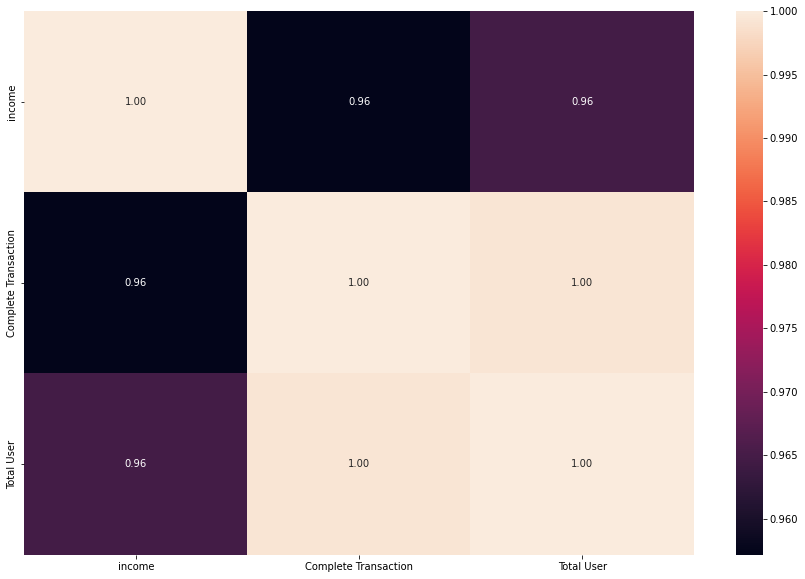

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df6.corr(), annot=True, fmt='.2f')
plt.show()

Perbandingan antara 3 variabel yaitu Jumlah user, transaksi yang berhasil, dan pendapatan. Jika dilihat dari korelasi ketiga variabel tersebut, mereka saling bergantung satu sama lain karena memiliki nilai yang tinggi yaitu 0,96, yang artinya jika 1 variabel berubah, maka variabel lainnya akan ikut mengalami perubahan 

### Query Total Sold Jeans Untuk Poin Pertanyaan Nomor 1

In [5]:
df4jeans = client.query('''
SELECT * FROM
  (SELECT product_category as Category, COUNT(product_category) as Total_sold, month 
   FROM 
    (SELECT product_category,EXTRACT(month FROM i.created_at) as month 
     FROM `bigquery-public-data.thelook_ecommerce.inventory_items` as i
     JOIN `bigquery-public-data.thelook_ecommerce.order_items` as oi
     ON i.product_id = oi.product_id 
     WHERE sold_at IS NOT NULL 
     AND status = 'Complete'
     AND product_category = 'Jeans'
     AND i.created_at BETWEEN '2022-01-01 00:00:00' AND '2022-09-30 23:59:59' 
     AND status = 'Complete')
GROUP BY product_category,month
ORDER BY month, COUNT(product_category)) AS G1

WHERE Total_sold =
(SELECT MAX(Total_sold)FROM
  (SELECT product_category as Category, COUNT(product_category) as Total_sold, month 
   FROM 
    (SELECT product_category,EXTRACT(month FROM i.created_at) as month 
     FROM `bigquery-public-data.thelook_ecommerce.inventory_items` as i
     JOIN `bigquery-public-data.thelook_ecommerce.order_items` as oi
     ON i.product_id = oi.product_id 
     WHERE sold_at IS NOT NULL 
     AND status = 'Complete'
     AND product_category = 'Jeans'
     AND i.created_at BETWEEN '2022-01-01 00:00:00' AND '2022-09-30 23:59:59' and status = 'Complete')
     GROUP BY product_category,month
     ORDER BY month, COUNT(product_category))AS G2
     WHERE G1.month=G2.month)
order by month
''').to_dataframe()

df4jeans

,Category,Total_sold,month
0,Jeans,847,1
1,Jeans,863,2
2,Jeans,1087,3
3,Jeans,994,4
4,Jeans,1261,5
5,Jeans,1319,6
6,Jeans,1638,7
7,Jeans,1944,8
8,Jeans,1817,9


# Poin Pertanyaan
1. **Apakah problem statement yang kamu definisikan di awal dapat terukur ketercapaiannya? berikan pendapatmu!**

**Total Complete Transaction:**
- Bulan 1: 1555
- Bulan 2: 1458
- Bulan 3: 1896
- Bulan 4: 2002
- Bulan 5: 2142
- Bulan 6: 2202
- Bulan 7: 2711
- Bulan 8: 3146
- Bulan 9: 3536

**Total Sold Jeans:** 
- Bulan 1 (Jeans): 847	
- Bulan 2 (Jeans): 863	
- Bulan 3 (Jeans): 1087	
- Bulan 4 (Jeans): 994	
- Bulan 5 (Jeans): 1261	
- Bulan 6 (Jeans): 1319	
- Bulan 7 (Jeans): 1638	
- Bulan 8 (Jeans): 1944	
- Bulan 9 (Jeans): 1817	

Berdasarkan Perbandingan Complete Transaction dan Sold Jeans, dapat dilihat bahwa rata-rata 50% dari transaksi yang berhasil didapatkan dari penjualan jeans. Dengan jumlah peminat Jeans yang tinggi pada E-Commerce ini, peningkatan penjualan Jeans akan lebih mudah karena sudah memiliki banyak peminat dan dapat lebih mudah jika dibantu dengan adanya promo gratis ongkir 

**2. Berdasarkan hasil analisis yang sudah kamu lakukan dari 6 penjabaran di atas, jika CEO perusahaanmu ingin menargetkan pendapatan di awal kuartal 4 harus mencapai $250000, apakah masuk akal?**
- Bulan	1: 1720022.0 USD
- Bulan	2: 1678457.0 USD
- Bulan	3: 1875470.0 USD
- Bulan	4: 1866467.0 USD
- Bulan	5: 2015857.0 USD
- Bulan	6: 2111335.0 USD
- Bulan	7: 2326280.0 USD
- Bulan	8: 2666555.0 USD
- Bulan	9: 2487757.0 USD

- Pendapatan Q1 = 5273949
- Pendapatan Q2 = 5993659
- Pendapatan Q3 = 7480592

Jika Dilihat dari tabel pendapatan per bulan, total pendapatan dari setiap quarter kebanyakan meningkat hingga akhir quarter 3. Dari Pendapatan Q1 sampai Q3, Pendapatan dari Q1 sampai Q2 mengalami kenaikan sebesar 13,65% dan pendapatan daru Q2 sampai Q3 mengalami kenaikan sebesarr 19,88%.

melihat kenaikan pendapatan tersebut, bukan tidak mungkin jika CEO ingin menargetkan untuk mendapatkan pendapatan yang lebih tinggi, mengingat bahwa setiap kuarter E-Commerce ini selalu mengalami kenaikan

3. CEO kamu menargetkan di kuartal 4 ada investor yang dapat menyuntikan dana ke perusahaanmu, dimana investor akan melihat GMV selama 3 kuartal terakhir serta prospek kedepan minimal di kuartal 4 akan seperti apa. Berikan informasi kepada CEO mu berdasarkan trend transaksi, jumlah user yang bertransaksi, dan GMV 3 kuartal terakhir, apakah perusahaanmu layak atau tidak mendapatkan investor baru!


In [28]:
df6['GMV'] = round(df6['income'] * df6['Complete Transaction'])
df6['month'] = df2['month']
df6

,income,Complete Transaction,Total User,GMV,month
0,1720022.0,1555,1092,2.674634e+09,1
1,1678457.0,1458,1019,2.447190e+09,2
2,1875470.0,1896,1307,3.555891e+09,3
3,1866467.0,2002,1404,3.736667e+09,4
4,2015857.0,2142,1496,4.317966e+09,5
5,2111335.0,2202,1542,4.649160e+09,6
6,2326280.0,2711,1903,6.306545e+09,7
7,2666555.0,3146,2184,8.388982e+09,8
8,2487757.0,3536,2398,8.796709e+09,9


Jika dilihat dari total transaksi dan total user, tingkat transaksi dan jumlah user terus meningkat dan jumlah transaksi dan total user berbanding lurus yang artinya semakin banyak user melakukan transaksi, semakin banyak transaksi yang berhasil. Dilihat dari data juga bisa disimpulkan bahwa ada user yang melakukan transaksi lebih dari 1 kali sehingga transaksi yang terjadi lebih banyak dari jumlah user.

Maka dapat disimpulkan jika investor ingin melakukan penyuntikan dana, perusahaan E-Commerce ini sangat layak untuk diberikan dana karena GMV nya yang setiap bulan mengalami kenaikan 

# Poin Analisis

Dari analisa smart saya yaitu **"Mempertahankan tingkat penjualan Jeans dan mendapatkan kenaikan pendapatan dari jeans sebesar 5% pada Quarter kedua tahun 2023 dengan memberikan ongkos kirim gratis untuk pembelian Jeans"**
Analisis yang perlu saya lakukan adalah menganalisa Transaksi yang ada di perusahan E-Commerce ini. Beberapa hal yang akan saya analisa adalah: 
- Jumlah transaksi yang berhasil
- Jumlah User yang melakukan transaksi
- Jumlah Pendapatan
- Produk yang paling diminati
- Produk yang menyumbang total pendapatan terbesar

Analisa dilakukan dengan dibagi menjadi 3 Quarter
- Q1: Januari-Maret
- Q2: April-Juni
- Q3: Juli-September

Jika dilihat dari total pendapatan, Perusahaan mengalami kenaikan pendapatan dari Q1-Q3
- Pendapatan Q1 = 5273949
- Pendapatan Q3 = 7480592

Jika dilihat dari total user yang melakukan transaksi, Perusahaan mengalami peningkatan jumlah user yang melakukan transaksi:
- Total User Q1 = 1092
- Total User Q2 = 2398

Perusahaan E-Commerce ini memiliki potensi yang baik karena transaksi yang ada terus meningkat dan dapat meraih pendapatan yang terus meningkat. Alasan saya ingin menaikan pendapatan dari transaksi Jeans sebesar 5% pada Q2 tahun 2023 adalah saya melihat bahwa dari total transaksi yang berhasil. 48,5% dari transaksi tersebut adalah transaksi Jeans
- Total Transaksi = 20.648
- Total Transaksi Jeans = 10.020

Jika promosi terus dilakukan, bukan tidak mungkin bahwa transaksi Jeans akan semakin naik
